# 2.3线性代数

In [1]:
import torch
x=torch.arange(20).reshape(4,5)
x,x.shape

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]),
 torch.Size([4, 5]))

In [2]:
#验证对称阵
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B==B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [3]:
#张量元素求和
x = torch.arange(4, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [4]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A_sum_axis0 = A.sum(axis=0)
A,A_sum_axis0, A_sum_axis0.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([40., 45., 50., 55.]),
 torch.Size([4]))

In [5]:
A_sum_axis1 = A.sum(axis=1,keepdim=True)
A_sum_axis1, A_sum_axis1.shape

(tensor([[ 6.],
         [22.],
         [38.],
         [54.],
         [70.]]),
 torch.Size([5, 1]))

In [6]:
A/A_sum_axis1#因为非降维求和仍保持两个轴，所以可以通过广播机制将A除以A_sum_axis1

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [7]:
A,A.cumsum(axis=0),A.cumsum(axis=0).shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 torch.Size([5, 4]))

In [8]:
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [9]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [10]:
B = torch.ones(4, 3)
A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

In [11]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)#求向量的L2范数

tensor(5.)

In [12]:
torch.norm(u,p=1)#求向量的L1范数

tensor(7.)

In [13]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

In [14]:
import torch
from IPython import display
from d2l import torch as d2l


# 2.4.微积分

In [3]:
#为了配置matplotlib生成图形的属性，我们需要定义几个函数。 在下面，use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像。

#注意，注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x
x = np.arange(0, 3, 0.1)#这里的plot绘图函数的输入值只能是numpy数值类型，不能是张量类型
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])#2 * x - 3是f（x）在x=1处的切线

# 2.5自动微分


## 2.5.1一个简单的例子

In [ ]:
import torch
x=torch.arange(4.0,requires_grad=True)#requires_grad=True表示x可以参与求导，也可以向后求导
print(x.grad)  # 默认值是None

In [ ]:
#现在让我们计算y
y = 2 * torch.dot(x, x)
y

In [1]:
#我们通过调用反向传播函数来自动计算y关于x每个分量的梯度，并输出这些梯度。
y.backward()
x.grad

NameError: name 'y' is not defined

In [ ]:
x.grad==4*x

In [ ]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

## 2.5.2. 非标量变量的反向传播

In [ ]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 在我们的例子中，我们只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
y.backward(torch.ones(len(x)))
#y.sum().backward()
x.grad

## 2.5.3.分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，我们希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。实现方法：y.detach()这里y就会移除计算图，不在发挥作用，可以将其看作常数。

计算图的介绍：https://www.yiibai.com/python_deep_learning/python_deep_learning_computational_graphs.html#

在这里，我们可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [ ]:
#z=y*x,y=x*x
x.grad.zero_()
y = x * x#是一个长度为4向量
u = y.detach()#分离y来返回一个新变量u，该变量与y具有相同的值 
z = u * x#将u作为常数处理
z.sum().backward()#对z中所有元素求和之后利用反向传播函数求梯度
x.grad == u#验证是否正确

## 2.5.4. Python控制流的梯度计算 

In [71]:
#while循环的迭代次数和if语句的结果都取决于输入a的值。
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a=torch.tensor([2,3,4],dtype=torch.float32)
f(a)/a#于任何a，存在某个标量k，使得f(a)=k*a

tensor([256., 256., 256.])

In [72]:
a=torch.randn(size=(),requires_grad=True)
d=f(a)
d.backward()
a.grad==d/a

tensor(True)

# 2.6 概率

In [76]:
#matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
fair_probs = torch.ones([6]) / 6 #概率向量
#fair_probs
multinomial.Multinomial(10, fair_probs).sample()
multinomial.Multinomial(10, fair_probs).sample((500,))#为了抽取一个样本，即掷骰子，我们需传入一个概率向量。 输出是另一个相同长度的向量
#multinomial.Multinomial(10, fair_probs).sample((500,)).shape

tensor([[1., 3., 2., 2., 2., 0.],
        [0., 2., 3., 0., 3., 2.],
        [1., 1., 2., 2., 3., 1.],
        ...,
        [3., 0., 4., 2., 1., 0.],
        [3., 1., 1., 3., 1., 1.],
        [2., 1., 3., 1., 1., 2.]])

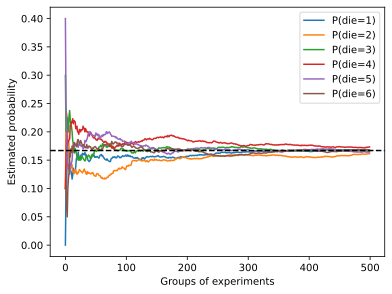

In [77]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();